# 1: H2O

## Instalação do H2O

In [1]:
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
     |████████████████████████████████| 164.8MB 66kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=6c52befd37335aefbec8272c0e699d17aaf94ab223add4b6980b6bf0f95bf952
  Stored in directory: /root/.cache/pip/wheels/4d/94/84/02ea21db1eebcef2da872861ce0db478788e27d24bcd5394fb
Successfully built h2o


## Introdução ao H2O

Desde o 3.28.0.1, é possível utilizar o H2OAutoML como um estimador Scikit-Learn e combiná-lo com outros componentes do sklearn. Possui 2 wrappers para o H2OAutoML:

*   H2OAutoMLClassifier
*   H2OAutoMLRegressor

API com chamadas semelhantes ao sklearn (fit, predict, fit_predict, score, get_params, set_params) e aceica diversos formatos de entrada(H2OFrame, numpy array, pandas Dataframe), podendo ser combinado com os pipelines do sklearn.

Propriedades da classe H2OAutoML podem ser acessadas pela propriedade estimator: *leaderboard, leader, event_log, training_info*, ...

Mais detalhes podem ser acessados no próprio [site do H2O AutoML](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html).

## Detalhes importantes antes de começar

**Algoritmos**


---


O H2O suporta uma gama de algoritmos supervisionados e não supervisionados. Veja [aqui](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science.html).

Dados


---


Como e de onde posso importar dados:


*   [Upload de arquivos](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/uploading-data.html)
*   [Importando dados de um servidor](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/importing-data.html)
* [Outras formas](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/getting-data-into-h2o.html)

# 2: Aprendizagem de Máquina com o H2O

## Inicializando o H2O

In [2]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpg5_cw4b_
  JVM stdout: /tmp/tmpg5_cw4b_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpg5_cw4b_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,"7 days, 7 hours and 17 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_nvl8qk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


## Primeiro exemplo

In [3]:
from h2o.estimators import H2OXGBoostEstimator
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()

df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = pd.Series(wine.target)
df_wine = h2o.H2OFrame(df_wine)

df_wine.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,0
13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,0
14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,0
13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,0
14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290,0
14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045,0
13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


In [4]:
# convert columns to factors
df_wine['target'] = df_wine['target'].asfactor()  # será o rotulo

# set the predictor and response columns
predictors = ["alcohol", "malic_acid", "ash", "hue"]
response_col = "target"

# split into train and testing sets
train, test = df_wine.split_frame(ratios = [0.6], seed = 1)

# Initialize model
xgb_model = H2OXGBoostEstimator()

xgb_model.train(predictors, response_col, training_frame = train)

# predict using the model and the testing dataset
perf = xgb_model.model_performance(test)

# View a summary of the prediction
perf

xgboost Model Build progress: |███████████████████████████████████████████| 100%

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.09458979376006926
RMSE: 0.3075545378629118
LogLoss: 0.3258428228653978
Mean Per-Class Error: 0.12611949454054716
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,20.0,2.0,0.0,0.090909,2 / 22
1,2.0,24.0,0.0,0.076923,2 / 26
2,2.0,2.0,15.0,0.210526,4 / 19
3,24.0,28.0,15.0,0.119403,8 / 67



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.880597
1,2,1.000000
2,3,1.000000


## Segundo exemplo

In [5]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# import the prostate dataset
prostate = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv")

print(type(prostate))

print(prostate.shape)
prostate.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%
<class 'h2o.frame.H2OFrame'>
(380, 9)


ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0,6
2,0,72,1,3,2,6.7,0,7
3,0,70,1,1,2,4.9,0,6
4,0,76,2,2,1,51.2,20,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0,8
7,0,68,2,4,2,31.9,0,7
8,0,61,2,4,2,66.7,27.2,7
9,0,69,1,1,1,3.9,24,7
10,0,68,2,1,2,13,0,6


**Descrição dos atributos da base**

ID: A row identifier. This can be dropped from the list of predictors.

CAPSULE: Whether the tumor penetrated the prostatic capsule

AGE: The patient’s age

RACE: The patient’s race

DPROS: The result of the digital rectal exam, where 1=no nodule; 2=unilober nodule on the left; 3 =unilibar nodule on the right; and 4=bilobar nodule.

DCAPS: Whether there existed capsular involvement on the rectal exam

PSA: The Prostate Specific Antigen Value (mg/ml)

VOL: The tumor volume (cm3)

GLEASON: The patient’s Gleason score in the range 0 to 10

In [6]:
# convert columns to factors
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()

# set the predictor and response columns
predictors = ["AGE", "RACE", "VOL", "GLEASON"]
response_col = "CAPSULE"

# split into train and testing sets
train, test = prostate.split_frame(ratios = [0.8], seed = 1234)

# set GLM modeling parameters
# and initialize model training
gbm_model = H2OGradientBoostingEstimator()

gbm_model.train(predictors, response_col, training_frame= train)

# predict using the model and the testing dataset
perf = gbm_model.model_performance(test)

# View a summary of the prediction
perf.show()

gbm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.22920272689910776
RMSE: 0.47875121608107457
LogLoss: 0.6874414852643227
Mean Per-Class Error: 0.30782312925170063
AUC: 0.699404761904762
AUCPR: 0.4456307588755022
Gini: 0.39880952380952395

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26035060082434025: 


,,0,1,Error,Rate
0,0,27.0,22.0,0.449,(22.0/49.0)
1,1,4.0,20.0,0.1667,(4.0/24.0)
2,Total,31.0,42.0,0.3562,(26.0/73.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.260351,0.606061,38.0
1,max f2,0.075007,0.759494,56.0
2,max f0point5,0.494459,0.546875,23.0
3,max accuracy,0.802625,0.712329,13.0
4,max precision,0.802625,0.600000,13.0
5,max recall,0.075007,1.000000,56.0
6,max specificity,0.963028,0.979592,0.0
7,max absolute_mcc,0.260351,0.365283,38.0
8,max min_per_class_accuracy,0.429804,0.653061,30.0
9,max mean_per_class_accuracy,0.260351,0.692177,38.0



Gains/Lift Table: Avg response rate: 32.88 %, avg score: 40.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013699,0.950842,0.000000,0.000000,0.000000,0.963028,0.000000,0.963028,0.000000,0.000000,-100.000000,-100.000000,-0.020408
1,2,0.027397,0.942434,0.000000,0.000000,0.000000,0.946103,0.000000,0.954566,0.000000,0.000000,-100.000000,-100.000000,-0.040816
2,3,0.041096,0.935743,3.041667,1.013889,1.000000,0.937763,0.333333,0.948965,0.041667,0.041667,204.166667,1.388889,0.000850
3,4,0.041096,0.926650,0.000000,1.013889,0.000000,0.000000,0.333333,0.948965,0.000000,0.041667,-100.000000,1.388889,0.000850
4,5,0.054795,0.912160,0.000000,0.760417,0.000000,0.925135,0.250000,0.943007,0.000000,0.041667,-100.000000,-23.958333,-0.019558
5,6,0.109589,0.866788,1.520833,1.140625,0.500000,0.886096,0.375000,0.914552,0.083333,0.125000,52.083333,14.062500,0.022959
6,7,0.164384,0.821605,2.281250,1.520833,0.750000,0.840100,0.500000,0.889734,0.125000,0.250000,128.125000,52.083333,0.127551
7,8,0.205479,0.800769,3.041667,1.825000,1.000000,0.811200,0.600000,0.874028,0.125000,0.375000,204.166667,82.500000,0.252551
8,9,0.301370,0.543866,0.869048,1.520833,0.285714,0.643744,0.500000,0.800756,0.083333,0.458333,-13.095238,52.083333,0.233844
9,10,0.397260,0.473301,1.303571,1.468391,0.428571,0.501138,0.482759,0.728434,0.125000,0.583333,30.357143,46.839080,0.277211


## EXERCÍCIO 1: Hora de praticar o treinamento de modelos

Atividades:

1.   Importe ou faça um upload de uma base de dados
2.   Defina os atributos preditores e a classe
3.   Particione a base em treino e teste (escolha o ratio desejado)
4.   Selecione um algoritmo de classificação e defina seus atributos
5.   Treine-o e apresente sua performance

In [7]:
iris = datasets.load_iris()

from sklearn import datasets
import pandas as pd
from h2o.estimators import H2ONaiveBayesEstimator

iris = datasets.load_iris()

dfIris = pd.DataFrame(iris.data, columns=iris.feature_names)
dfIris['target'] = pd.Series(iris.target)
dfIris = h2o.H2OFrame(dfIris) # tranforma um pandasDf em h2oDf

dfIris.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
5.1,3.5,1.4,0.2,0
4.9,3,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0
4.6,3.4,1.4,0.3,0
5,3.4,1.5,0.2,0
4.4,2.9,1.4,0.2,0
4.9,3.1,1.5,0.1,0


In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
#convert columns to factors
dfIris['target'] = dfIris['target'].asfactor()

# set the predictor and response columns
predictors = iris.feature_names
response_col = "target"

# split into train and testing sets
train, test = dfIris.split_frame(ratios = [0.6], seed = 1)

# Initialize model
NBModel = H2ONaiveBayesEstimator()

NBModel.train(predictors, response_col, training_frame = train)

# predict using the model and the testing dataset
perf = NBModel.model_performance(test)

# View a summary of the prediction
perf.show()

naivebayes Model Build progress: |████████████████████████████████████████| 100%

ModelMetricsMultinomial: naivebayes
** Reported on test data. **

MSE: 0.02159044698420859
RMSE: 0.14693688095304253
LogLoss: 0.08011067983538094
Mean Per-Class Error: 0.018518518518518517
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,17.0,0.0,0.0,0.000000,0 / 17
1,0.0,21.0,0.0,0.000000,0 / 21
2,0.0,1.0,17.0,0.055556,1 / 18
3,17.0,22.0,17.0,0.017857,1 / 56



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.982143
1,2,1.000000
2,3,1.000000


## EXERCÍCIO 2: Mais um exercício de treinamento de modelos

Atividades:

1.   Aproveite o código da questão anterior
2.   Use a mesma base de dados
3.   Considere a mesma divisão de treino e teste
4.   Selecione mais dois algoritmos de classificação e defina seus atributos
5.   Treine-os e compare-os com os resultados do último exercício

In [10]:
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OGradientBoostingEstimator

# Initialize model
models = [H2ORandomForestEstimator(), H2OGradientBoostingEstimator()]


for model in models:
  print(60 * "*")
  model.train(predictors, response_col, training_frame = train)
  print(model)
  model.model_performance(test).show()



************************************************************
drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1617330142300_56


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,150.0,18938.0,1.0,7.0,3.273333,2.0,11.0,5.406667




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.05039200367316631
RMSE: 0.22448163326465334
LogLoss: 0.15651070821758448
Mean Per-Class Error: 0.06573275862068965
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,33.0,0.0,0.0,0.000000,0 / 33
1,0.0,26.0,3.0,0.103448,3 / 29
2,0.0,3.0,29.0,0.093750,3 / 32
3,33.0,29.0,32.0,0.063830,6 / 94



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.93617
1,2,1.00000
2,3,1.00000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc
0,,2021-04-02 02:22:37,0.007 sec,0.0,NaN,NaN,NaN,NaN,NaN
1,,2021-04-02 02:22:38,0.071 sec,1.0,0.263523,1.957329,0.055556,NaN,NaN
2,,2021-04-02 02:22:38,0.090 sec,2.0,0.245652,1.810390,0.051724,NaN,NaN
3,,2021-04-02 02:22:38,0.101 sec,3.0,0.263905,2.034092,0.086957,NaN,NaN
4,,2021-04-02 02:22:38,0.113 sec,4.0,0.255931,1.749860,0.098765,NaN,NaN
5,,2021-04-02 02:22:38,0.125 sec,5.0,0.270168,1.985609,0.089888,NaN,NaN
6,,2021-04-02 02:22:38,0.137 sec,6.0,0.265280,1.959808,0.088889,NaN,NaN
7,,2021-04-02 02:22:38,0.149 sec,7.0,0.262537,1.937563,0.076923,NaN,NaN
8,,2021-04-02 02:22:38,0.162 sec,8.0,0.276007,1.918254,0.096774,NaN,NaN
9,,2021-04-02 02:22:38,0.173 sec,9.0,0.266697,1.561261,0.096774,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal length (cm),1310.448120,1.000000,0.478530
1,petal width (cm),1124.446533,0.858063,0.410609
2,sepal length (cm),244.775421,0.186788,0.089383
3,sepal width (cm),58.816399,0.044883,0.021478




ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.017996643684131973
RMSE: 0.13415156981612988
LogLoss: 0.0664701666778739
Mean Per-Class Error: 0.037037037037037035
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,17.0,0.0,0.0,0.000000,0 / 17
1,0.0,21.0,0.0,0.000000,0 / 21
2,0.0,2.0,16.0,0.111111,2 / 18
3,17.0,23.0,16.0,0.035714,2 / 56



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.964286
1,2,1.000000
2,3,1.000000


************************************************************
gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1617330142300_57


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,150.0,22382.0,1.0,5.0,4.286667,2.0,8.0,7.22




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.0015044127008045126
RMSE: 0.038786759349093765
LogLoss: 0.018505678933257337
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,33.0,0.0,0.0,0.0,0 / 33
1,0.0,29.0,0.0,0.0,0 / 29
2,0.0,0.0,32.0,0.0,0 / 32
3,33.0,29.0,32.0,0.0,0 / 94



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc
0,,2021-04-02 02:22:40,0.005 sec,0.0,0.666667,1.098612,0.617021,NaN,NaN
1,,2021-04-02 02:22:40,0.020 sec,1.0,0.605807,0.931333,0.053191,NaN,NaN
2,,2021-04-02 02:22:40,0.035 sec,2.0,0.550289,0.799931,0.063830,NaN,NaN
3,,2021-04-02 02:22:40,0.051 sec,3.0,0.500045,0.693912,0.042553,NaN,NaN
4,,2021-04-02 02:22:40,0.066 sec,4.0,0.454816,0.606634,0.063830,NaN,NaN
5,,2021-04-02 02:22:40,0.085 sec,5.0,0.413937,0.533074,0.031915,NaN,NaN
6,,2021-04-02 02:22:40,0.100 sec,6.0,0.378031,0.471804,0.042553,NaN,NaN
7,,2021-04-02 02:22:40,0.113 sec,7.0,0.345892,0.419253,0.031915,NaN,NaN
8,,2021-04-02 02:22:40,0.132 sec,8.0,0.317343,0.373878,0.042553,NaN,NaN
9,,2021-04-02 02:22:40,0.147 sec,9.0,0.291386,0.333960,0.021277,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal width (cm),165.542664,1.000000,0.576477
1,petal length (cm),112.714203,0.680877,0.392510
2,sepal width (cm),4.632274,0.027982,0.016131
3,sepal length (cm),4.273429,0.025815,0.014882




ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.029001368004060925
RMSE: 0.1702978802101216
LogLoss: 0.10686090499900044
Mean Per-Class Error: 0.037037037037037035
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,17.0,0.0,0.0,0.000000,0 / 17
1,0.0,21.0,0.0,0.000000,0 / 21
2,0.0,2.0,16.0,0.111111,2 / 18
3,17.0,23.0,16.0,0.035714,2 / 56



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.964286
1,2,1.000000
2,3,1.000000


## Treinando modelos com validação cruzada

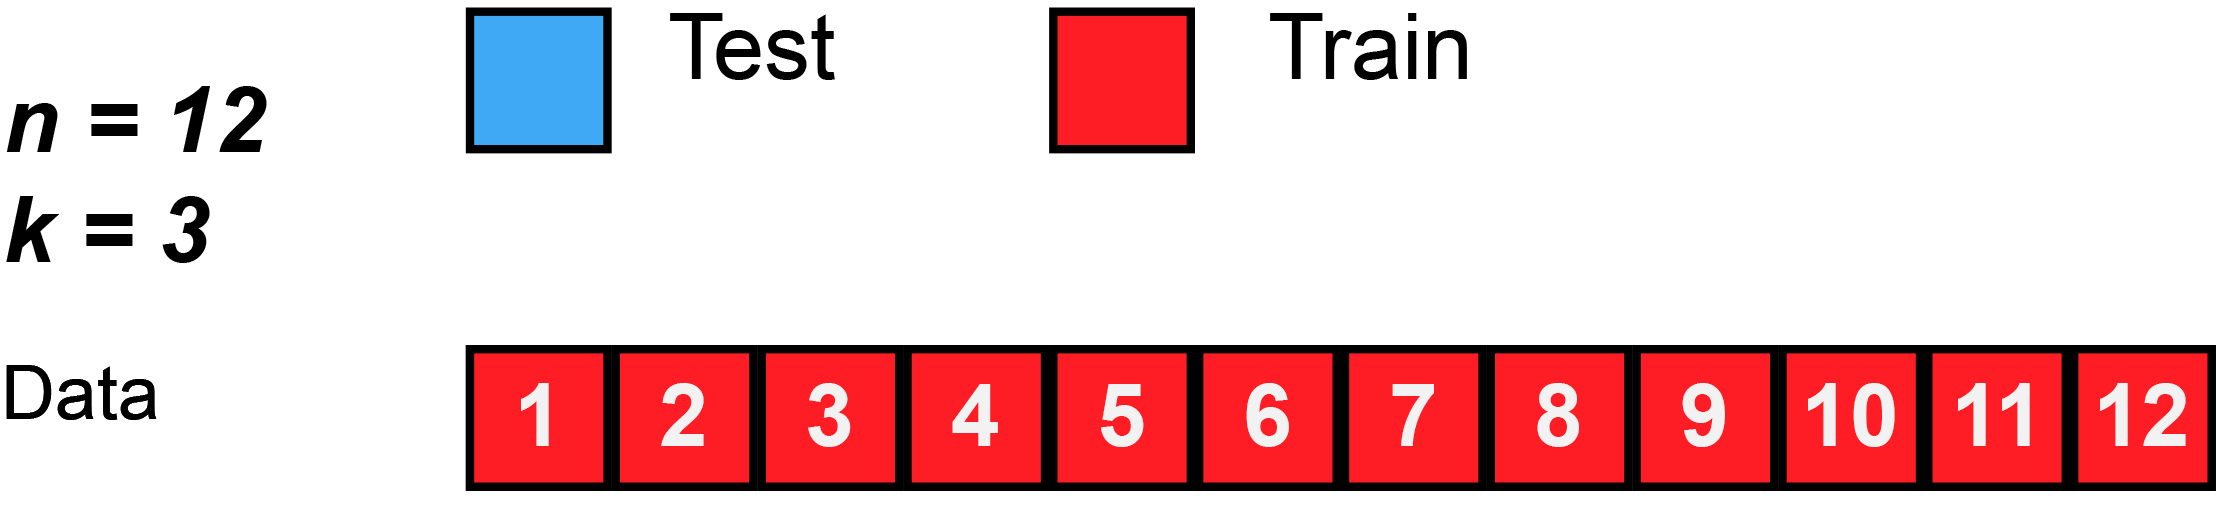

In [11]:
import h2o
h2o.init()

from h2o.estimators.gbm import H2OGradientBoostingEstimator

prostate = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv")

# convert columns to factors
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()

# set the predictor and response columns
predictors = ["AGE", "RACE", "VOL", "GLEASON"]
response_col = "CAPSULE"

# set GLM modeling parameters
# and initialize model training

gbm_model = H2OGradientBoostingEstimator(nfolds = 5, seed=1)
gbm_model.train(x=predictors, y=response_col, training_frame=prostate)

# predict using the model and the testing dataset
gbm_model.model_performance()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,17 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,"7 days, 7 hours and 17 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_nvl8qk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.179 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12101223486489894
RMSE: 0.3478681285557775
LogLoss: 0.38371316949451995
Mean Per-Class Error: 0.16348507097405784
AUC: 0.9187469407733725
AUCPR: 0.8854440617595829
Gini: 0.837493881546745

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41036511888180965: 


,,0,1,Error,Rate
0,0,178.0,49.0,0.2159,(49.0/227.0)
1,1,17.0,136.0,0.1111,(17.0/153.0)
2,Total,195.0,185.0,0.1737,(66.0/380.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.410365,0.804734,116.0
1,max f2,0.274548,0.883749,144.0
2,max f0point5,0.607372,0.817556,72.0
3,max accuracy,0.444057,0.828947,107.0
4,max precision,0.949020,1.000000,0.0
5,max recall,0.200712,1.000000,168.0
6,max specificity,0.949020,1.000000,0.0
7,max absolute_mcc,0.410365,0.660374,116.0
8,max min_per_class_accuracy,0.444057,0.828194,107.0
9,max mean_per_class_accuracy,0.410365,0.836515,116.0



Gains/Lift Table: Avg response rate: 40.26 %, avg score: 40.28 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010526,0.933997,2.483660,2.483660,1.000000,0.943398,1.000000,0.943398,0.026144,0.026144,148.366013,148.366013,0.026144
1,2,0.021053,0.920442,2.483660,2.483660,1.000000,0.926188,1.000000,0.934793,0.026144,0.052288,148.366013,148.366013,0.052288
2,3,0.036842,0.895948,2.483660,2.483660,1.000000,0.905568,1.000000,0.922268,0.039216,0.091503,148.366013,148.366013,0.091503
3,4,0.044737,0.884554,2.483660,2.483660,1.000000,0.886026,1.000000,0.915872,0.019608,0.111111,148.366013,148.366013,0.111111
4,5,0.050000,0.876678,2.483660,2.483660,1.000000,0.879865,1.000000,0.912082,0.013072,0.124183,148.366013,148.366013,0.124183
5,6,0.100000,0.812231,2.483660,2.483660,1.000000,0.844427,1.000000,0.878255,0.124183,0.248366,148.366013,148.366013,0.248366
6,7,0.150000,0.745902,2.222222,2.396514,0.894737,0.789119,0.964912,0.848543,0.111111,0.359477,122.222222,139.651416,0.350667
7,8,0.200000,0.683905,2.091503,2.320261,0.842105,0.713257,0.934211,0.814721,0.104575,0.464052,109.150327,132.026144,0.442026
8,9,0.302632,0.585844,1.719457,2.116510,0.692308,0.639247,0.852174,0.755213,0.176471,0.640523,71.945701,111.651037,0.565633
9,10,0.410526,0.465826,1.332696,1.910508,0.536585,0.511759,0.769231,0.691228,0.143791,0.784314,33.269568,91.050779,0.625723


# 3: AutoML com o H2O

## Seleção de parâmetros

### Otimização de parâmetros de algoritmos

* Algoritmos de aprendizagem possuem uma [variedade de hiperparâmetros](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#supported-grid-search-hyperparameters). 

* Geralmente usamos algoritmos com seus hiperparâmetros assumindo valores *default*.

* A escolha de valores adequados para os hiperparâmetros é decisiva para a melhora no desempenho do algoritmo.

* Dado um algoritmo de aprendizagem, como selecionar seus parâmetros de modo a maximizar seu desempenho na tarefa? 


---


Esse desafio é chamado de *Parameter Selection Problem*.

Esse problema pode ser tratado como um problema de BUSCA.


---



A classe *H2OGridSearch* permite que o especialista defina:

*   *model_type* - o algoritmo que deseja selecionar os parâmetros.
*   *hyper_params* - os hiperparâmetros que deseja otimizar e o conjunto de valores de cada hiperparâmetro a ser testado.
*   *search_criteria* - a estratégia de busca pelos valores ótimos (exaustiva ou aleatória)



---



O valor *default* para o *search_criteria* significa que será adotada a abordagem exaustiva. Caso contrário, você pode adotar as seguintes configurações de busca aleatória:
```
{'strategy': "RandomDiscrete", 'max_models': 10, 'seed': 1}
{'strategy': "RandomDiscrete", 'max_runtime_secs': 3600}
{'strategy': "RandomDiscrete", 'max_models': 42, 'max_runtime_secs': 28800}
{'strategy': "RandomDiscrete", 'stopping_tolerance': 0.001, 'stopping_rounds': 10}
{'strategy': "RandomDiscrete", 'stopping_metric': "misclassification", 'stopping_tolerance': 0.0005, 'stopping_rounds': 5}
```




In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,26 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,"7 days, 7 hours and 17 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_nvl8qk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.178 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [13]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

prostate = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv")

prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()

# set the predictor and response columns
predictors = ["AGE", "RACE", "VOL", "GLEASON"]
response_col = "CAPSULE"

# GBM hyperparameters
gbm_params = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

# Train and validate a cartesian grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid',
                          hyper_params=gbm_params)

gbm_grid.train(x=predictors, y=response_col, training_frame=prostate, seed=1, nfolds = 5)

# Get the grid results, sorted by validation AUC
gbm_gridperf = gbm_grid.get_grid()

all_gbms = gbm_gridperf.models
len(all_gbms)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Grid Build progress: |████████████████████████████████████████████████| 100%


36

In [14]:
gbm_gridperf

     col_sample_rate  ...          model_ids             logloss
0                0.2  ...   gbm_grid_model_4   0.579591046755859
1                0.2  ...  gbm_grid_model_22   0.579830522283417
2                0.5  ...  gbm_grid_model_23  0.5835784787324069
3                0.2  ...  gbm_grid_model_10  0.5839680028836036
4                0.5  ...   gbm_grid_model_5  0.5851523623169306
5                1.0  ...  gbm_grid_model_24  0.5873906438189376
6                0.2  ...  gbm_grid_model_16  0.5878935025667751
7                0.2  ...  gbm_grid_model_28  0.5881627673154558
8                0.2  ...  gbm_grid_model_34   0.588462487129328
9                1.0  ...   gbm_grid_model_6  0.5917603125021172
10               1.0  ...  gbm_grid_model_33  0.5967543892424082
11               1.0  ...  gbm_grid_model_27  0.5992979684315191
12               1.0  ...  gbm_grid_model_21  0.6032784106123632
13               1.0  ...  gbm_grid_model_15  0.6038928327314702
14               1.0  ...

In [15]:
# Grab the top GBM model, chosen by validation AUC
best_gbm = gbm_gridperf.models[0]
perf = best_gbm.model_performance()

params_ = ['learn_rate', 'max_depth', 'sample_rate', 'col_sample_rate']

print('Best parameters:', [best_gbm.actual_params[key] for key in params_])
print(perf)

Best parameters: [0.1, 3, 0.8, 0.2]

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.16738930219352885
RMSE: 0.4091323773469033
LogLoss: 0.5070769795474666
Mean Per-Class Error: 0.24603380265468888
AUC: 0.8301229449195244
AUCPR: 0.7612191456369366
Gini: 0.6602458898390489

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3152589723780433: 


,,0,1,Error,Rate
0,0,147.0,80.0,0.3524,(80.0/227.0)
1,1,22.0,131.0,0.1438,(22.0/153.0)
2,Total,169.0,211.0,0.2684,(102.0/380.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.315259,0.719780,118.0
1,max f2,0.216516,0.819304,161.0
2,max f0point5,0.538659,0.728083,78.0
3,max accuracy,0.538659,0.771053,78.0
4,max precision,0.887419,1.000000,0.0
5,max recall,0.138468,1.000000,207.0
6,max specificity,0.887419,1.000000,0.0
7,max absolute_mcc,0.538659,0.516415,78.0
8,max min_per_class_accuracy,0.384003,0.740088,100.0
9,max mean_per_class_accuracy,0.515726,0.753966,84.0



Gains/Lift Table: Avg response rate: 40.26 %, avg score: 40.39 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010526,0.850400,2.483660,2.483660,1.000000,0.870884,1.000000,0.870884,0.026144,0.026144,148.366013,148.366013,0.026144
1,2,0.021053,0.845043,2.483660,2.483660,1.000000,0.846761,1.000000,0.858823,0.026144,0.052288,148.366013,148.366013,0.052288
2,3,0.036842,0.824813,2.483660,2.483660,1.000000,0.828486,1.000000,0.845821,0.039216,0.091503,148.366013,148.366013,0.091503
3,4,0.042105,0.816656,0.000000,2.173203,0.000000,0.817271,0.875000,0.842253,0.000000,0.091503,-100.000000,117.320261,0.082693
4,5,0.050000,0.798687,1.655773,2.091503,0.666667,0.810563,0.842105,0.837249,0.013072,0.104575,65.577342,109.150327,0.091359
5,6,0.100000,0.746378,2.091503,2.091503,0.842105,0.776687,0.842105,0.806968,0.104575,0.209150,109.150327,109.150327,0.182719
6,7,0.150000,0.684257,2.222222,2.135076,0.894737,0.733332,0.859649,0.782423,0.111111,0.320261,122.222222,113.507625,0.285019
7,8,0.200000,0.608375,1.699346,2.026144,0.684211,0.627504,0.815789,0.743693,0.084967,0.405229,69.934641,102.614379,0.343555
8,9,0.302632,0.560581,1.592090,1.878943,0.641026,0.585764,0.756522,0.690134,0.163399,0.568627,59.208983,87.894288,0.445279
9,10,0.400000,0.458421,1.141141,1.699346,0.459459,0.527051,0.684211,0.650437,0.111111,0.679739,14.114114,69.934641,0.468285


### EXERCÍCIO 3: Hora de praticar a otimização de parâmetros

Atividades:


* Definir quais os hiperparâmetros e valores que deseja levar em consideração na otimização.

* Executar o *H2OGridSearch* usando uma estratégia de busca aleatória.

* Defina o critério de parada desta busca.

* Compare os resultados obtidos pelo melhor modelo encontrado com o da tarefa anterior. Verifique se há melhora.

Veja os possíveis valores de cada hiperparâmetro de cada algoritmo [aqui](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#random-grid-search-parameters).



In [16]:
#convert columns to factors
dfIris['target'] = dfIris['target'].asfactor()

# set the predictor and response columns
predictors = iris.feature_names
response_col = "target"

# predict using the model and the testing dataset
perf = NBModel.model_performance(test)

# View a summary of the prediction
perf.show()

# NB hyperparameters
NBParams = {'laplace': [x for x in range(1, 9, 1)],
            'min_prob': [x / 10.0 for x in range(1, 9, 1)],
            'eps_prob' : [x / 10.0 for x in range(1, 9, 1)]
          }

# Train and validate a cartesian grid of GBMs
_grid = H2OGridSearch(model=H2ONaiveBayesEstimator,
                          grid_id='NBGrid',
                          hyper_params=NBParams)

_grid.train(x=predictors,
            y=response_col,
            training_frame=dfIris,
            seed=1,
            nfolds = 5)

# Get the grid results, sorted by validation AUC
gridperf = _grid.get_grid()

all_gbms = gridperf.models
len(all_gbms)


ModelMetricsMultinomial: naivebayes
** Reported on test data. **

MSE: 0.02159044698420859
RMSE: 0.14693688095304253
LogLoss: 0.08011067983538094
Mean Per-Class Error: 0.018518518518518517
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,17.0,0.0,0.0,0.000000,0 / 17
1,0.0,21.0,0.0,0.000000,0 / 21
2,0.0,1.0,17.0,0.055556,1 / 18
3,17.0,22.0,17.0,0.017857,1 / 56



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.982143
1,2,1.000000
2,3,1.000000


naivebayes Grid Build progress: |█████████████████████████████████████████| 100%


512

## Seleção de algoritmos

### Seleção de algoritmos com parâmetros otimizados

No problema anterior, dado um algoritmo, usamos uma estratégia de busca para encontrar os melhores valores de hiperparâmetros. E se quisermos selecionar o melhor algoritmo dentre um conjunto de algoritmos?


---

* A escolha do algoritmo adequado e seus valores de hiperparâmetros é decisiva para a melhora no desempenho do algoritmo.

* Dado um problema de aprendizagem, como selecionar o algoritmo e seus parâmetros de modo a maximizar seu desempenho na tarefa? 


---


Esse desafio é chamado de *Algorithm Selection Problem*.

Esse problema pode ser tratado como um problema de BUSCA.


---



A classe *H2OAutoML* permite que o especialista defina:

*   *max_models* - o número máximo de algoritmos que deseja levar em consideração na busca.
*   *max_runtime_secs* - o tempo máximo que deseja executar a sua busca, ou seja, não limita o número de algoritmos envolvidos.

*   *include_algos* - o especialista determina que algoritmos quer que participe da busca.

*   *exclude_algos* - o especialista determina que algoritmos quer excluir da busca.


---

Os algoritmos disponíveis são (as siglas nesse formato são as strings identificadoras de cada um):


* DRF (Que inclui Random Forest e Extremely Randomized Trees (XRT))

* GLM

* XGBoost (XGBoost GBM)

* GBM (H2O GBM)

* DeepLearning (Fully-connected multi-layer artificial neural network)

* StackedEnsemble


---


**A versão atual do AutoML treina e realiza validação cruzada considerando os seguintes algoritmos: 
* três modelos XGBoost GBM (Gradient Boosting Machine) pré-especificados, 
* uma busca exaustiva fixa de GLMs, 
* uma Random Forest (DRF) com parâmetros *default*, 
* cinco H2O GBMs pré-definidos, uma Deep Neural Net com parâmetros *default*, uma Extremely Randomized Forest (XRT), 
* um conjunto de XGBoost GBMs com busca aleatória de parâmetros, 
* uma busca aleatória de H2O GBMs, e uma busca aleatória de Deep Neural Nets.






In [17]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 52 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,"7 days, 7 hours and 20 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_nvl8qk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.060 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

prostate = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv")

prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()

# set the predictor and response columns
predictors = ["AGE", "RACE", "VOL", "GLEASON"]
response_col = "CAPSULE"

# training
aml = H2OAutoML(max_models=100, seed=1, nfolds = 5)
aml.train(x=predictors, y=response_col, training_frame=prostate)

lb = aml.leaderboard
lb.head(rows=lb.nrows)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |██████████████████████████████████████████████████████

In [ ]:
#or aml.leader
aml.get_best_model().model_performance()

### EXERCÍCIO 4: Hora de praticar a seleção de algoritmos/parâmetros (parte 1)

Atividades:

* Instanciar o H2OAutoML e definir o critério de parada da busca.

* Imprima o ranking dos melhores algoritmos identificados.

* Compare os resultados obtidos pelo melhor modelo encontrado com o das tarefas anteriores. Verifique se há melhora.

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()
iris = datasets.load_iris()

dfIris = pd.DataFrame(iris.data, columns=iris.feature_names)
dfIris['target'] = pd.Series(iris.target)
dfIris = h2o.H2OFrame(dfIris) # tranforma um pandasDf em h2oDf

#convert columns to factors
dfIris['target'] = dfIris['target'].asfactor()

# set the predictor and response columns
predictors = iris.feature_names
response_col = "target"

aml = H2OAutoML(max_models=5, seed=1, nfolds = 5)
aml.train(x=predictors, y=response_col, training_frame=dfIris)
lb = aml.leaderboard
lb.head(rows=lb.nrows)


### EXERCÍCIO 5: Hora de praticar a seleção de algoritmos/parâmetros (parte 2)

Atividades:

* Instanciar o H2OAutoML e definir o critério de parada da busca.

* Definir que algoritmos participarão do processo de busca usando o *include_algos* ou *exclude_algos*.

* Imprima o ranking dos melhores algoritmos identificados.

* Compare os resultados obtidos pelo melhor modelo encontrado com o das tarefas anteriores. Verifique se há melhora.

In [ ]:
aml = H2OAutoML(max_models=5, seed=1, nfolds = 5,
                sort_metric = "logloss",
                include_algos = ["GLM", "DeepLearning", "DRF"],
               # exclude_algos = ["GBM"]
                )

aml.train(x=predictors, y=response_col, training_frame=dfIris)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

